In [1]:
# Common useful packages
import importlib
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy

# Useful package for reading and processing spectral data
import spectral

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data
hyperspectral_gta_data.set_data_dir('C:/spectral_data')

In [2]:
hyperspectral_gta_data.get_data_dir()

'C:/spectral_data'

In [3]:
hyperspectral_gta_data.available_datasets()

Available Images:
 WashingtonDC
 MicroscenePolymers
 FabricVehicleDetecitonRIT
 VegBaccharisUPWINS
 PaintDetectionUPWINS


In [4]:
hyperspectral_gta_data.download('MicroscenePolymers')
fname = hyperspectral_gta_data.get_fname('MicroscenePolymers')

Downloading...
From (original): https://drive.google.com/uc?id=1SjIToGJwkkWyBZER5Wv-1v1-I22Y-EBI
From (redirected): https://drive.google.com/uc?id=1SjIToGJwkkWyBZER5Wv-1v1-I22Y-EBI&confirm=t&uuid=9087e46e-e2e1-4211-ad34-0084bf17c5c9
To: C:\spectral_data\spectral_images\Microscene_Polymers.zip
100%|██████████| 558M/558M [00:31<00:00, 17.7MB/s] 


File saved as: C:/spectral_data\spectral_images\Microscene_Polymers\reflectance_image_polymers
File saved as: C:/spectral_data\spectral_images\Microscene_Polymers\reflectance_image_polymers.hdr
Filename: C:/spectral_data\spectral_images\Microscene_Polymers/reflectance_image_polymers


# PART 1: Open the image and load the data as a numpy array.
- We use the spectral package for reading the metadata.
- You should become familiar with the Spectral package: https://www.spectralpython.net/

In [5]:
# Open the image. This reads the metadata, but not the image data. 
im = spectral.envi.open(fname+'.hdr', fname)

In [6]:
# Print the number of rows, columns, and bands in the iamge, 
# which are stored in variables associated with the im object.
#    CODING NOTES: using f'...{var_name}' is a seamless way to incorporate variable values in text.]

print(f'Number of rows: {im.nrows}') 
print(f'Number of columns: {im.ncols}')
print(f'Number of bands: {im.nbands}')

# Print the wavelengths for the bands. Metadata about the bands are stored in the subclass im.bands.
# Each band is a light measured acros a range of wavelengths. 
# The center values of the ranges is stored in the varaible im.bands.centers.

print(f'Wavelengths for the band centers: {im.bands.centers}')

Number of rows: 852
Number of columns: 384
Number of bands: 452
Wavelengths for the band centers: [378.640015, 381.98999, 385.339996, 388.700012, 392.059998, 395.420013, 398.779999, 402.140015, 405.5, 408.869995, 412.230011, 415.600006, 418.970001, 422.339996, 425.709991, 429.079987, 432.450012, 435.829987, 439.209991, 442.579987, 445.959991, 449.339996, 452.720001, 456.109985, 459.48999, 462.880005, 466.26001, 469.649994, 473.040009, 476.429993, 479.820007, 483.209991, 486.600006, 490.0, 493.390015, 496.790009, 500.179993, 503.579987, 506.980011, 510.380005, 513.780029, 517.179993, 520.590027, 523.98999, 527.390015, 530.799988, 534.210022, 537.609985, 541.02002, 544.429993, 547.840027, 551.25, 554.659973, 558.070007, 561.48999, 564.900024, 568.309998, 571.72998, 575.140015, 578.559998, 581.97998, 585.390015, 588.809998, 592.22998, 595.650024, 599.070007, 602.48999, 605.909973, 609.340027, 612.76001, 616.179993, 619.599976, 623.030029, 626.450012, 629.880005, 633.299988, 636.72998, 640

In [7]:
# Load the image data into a numpy array.
#    See: https://www.spectralpython.net/class_func_ref.html?highlight=envi#spectral.SpyFile.load

imArr = im.load()
print(f'Shape of the image numpy array: {imArr.shape}')

Shape of the image numpy array: (852, 384, 452)


# PART 2: Viewing a grayscale and color image from the spectral image.

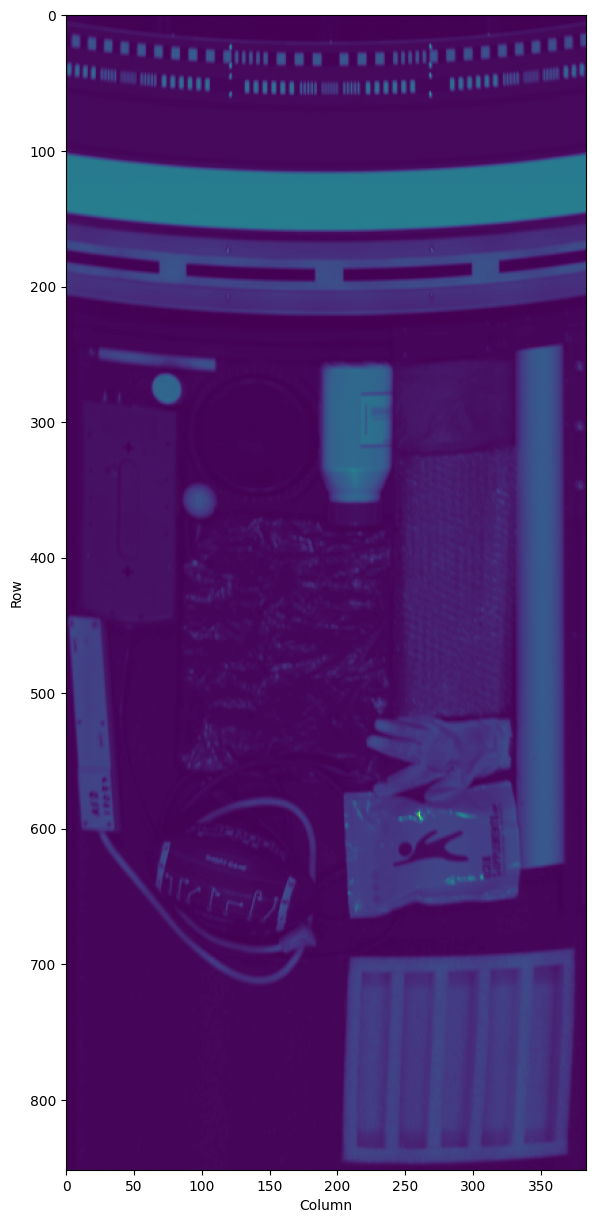

In [8]:
# View a single band from the image
band_idx = 50
plt.figure(figsize=(15,15))
plt.imshow(imArr[:,:,band_idx]);
plt.xlabel('Column');
plt.ylabel('Row');

### The image is longer than it is wide.  It will be easier to view if we rotate it using np.rot90.
### To have the y-axis display correct labels on the column numbers, we use np.flip(np.rot90(...,axis=0) together with plt.gca().invert_yaxis().
### Also, we use the grayscale colormap, rather than the default viridis.

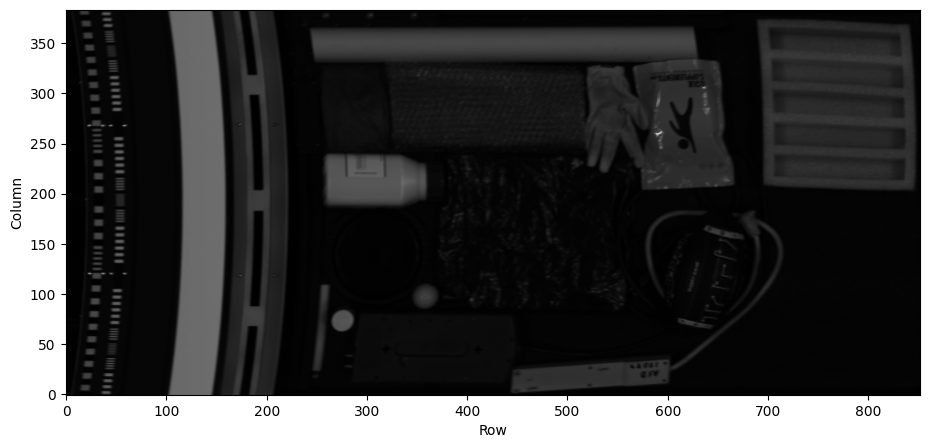

In [9]:
# View a single band from the iamge
band_idx = 50
plt.figure(figsize=(15,5)) # This creates a figure of the specified size using figsize=(width,height).
plt.imshow(np.flip(np.rot90(imArr[:,:,band_idx]), axis=0), cmap='gray');
plt.gca().invert_yaxis()  # Invert the y-axis to fix the tick order
plt.xlabel('Row');
plt.ylabel('Column');

## Create a color RGB (Red-Green-Blue) image from the hyperspectral image.

In [10]:
# Create a numpy array of the wavelengths for the iamge bands
wl = np.asarray(im.bands.centers)

# determine the indices for the red, green, and blue bands
red_band_idx = np.argmin(np.abs(wl-640))
green_band_idx = np.argmin(np.abs(wl-550))
blue_band_idx = np.argmin(np.abs(wl-460))

print(f'red index = {red_band_idx}, with wavelength = {wl[red_band_idx]}')
print(f'green index = {green_band_idx}, with wavelength = {wl[green_band_idx]}')
print(f'blue index = {blue_band_idx}, with wavelength = {wl[blue_band_idx]}')

red index = 77, with wavelength = 640.159973
green index = 51, with wavelength = 551.25
blue index = 24, with wavelength = 459.48999


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08953203..2.3962963].


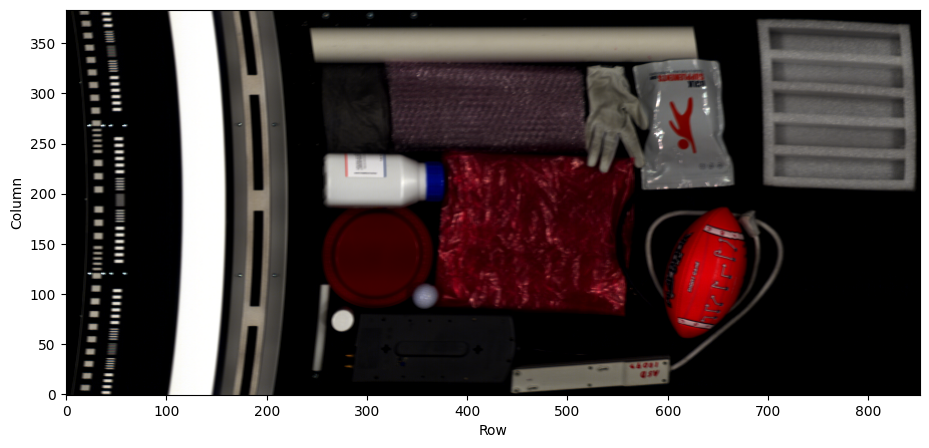

In [11]:
# View a single band from the image 
#     - this code shows that the imshow will not display the image properly unless we rescale the pixel values

# Create a numpy array for the RGB image with shape (nrows, ncold, 3)
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]

# plot the arraay
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB), axis=0), cmap='gray');
plt.gca().invert_yaxis()  # Invert the y-axis to fix the tick order
plt.xlabel('Row');
plt.ylabel('Column');

Initial min=-0.06338968873023987, initial max=1.2768136262893677
New min=0.0, new max=1.0
Initial min=-0.06246831640601158, initial max=2.396296262741089
New min=0.0, new max=1.0
Initial min=-0.0895320326089859, initial max=2.3629696369171143
New min=0.0, new max=1.0


C:\Users\wb8by\AppData\Local\Temp\ipykernel_14268\1758911566.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  imRGB[:,:,i] = imRGB[:,:,i] - np.min(imRGB[:,:,i])
C:\Users\wb8by\AppData\Local\Temp\ipykernel_14268\1758911566.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  imRGB[:,:,i] = imRGB[:,:,i] / np.max(imRGB[:,:,i])


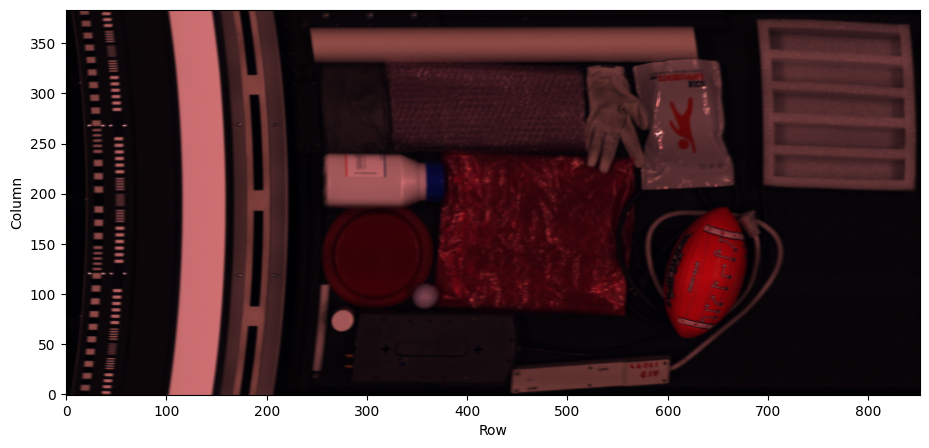

In [12]:
# View a single band from the image 
#     - this code shows rescale / normalize the pixel values in each band to [0,1] for viewing

# Create a numpy array for the RGB image with shape (nrows, ncold, 3)
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]
for i in range(3):
    print(f'Initial min={np.min(imRGB[:,:,i])}, initial max={np.max(imRGB[:,:,i])}')
    imRGB[:,:,i] = imRGB[:,:,i] - np.min(imRGB[:,:,i])
    imRGB[:,:,i] = imRGB[:,:,i] / np.max(imRGB[:,:,i])
    print(f'New min={np.min(imRGB[:,:,i])}, new max={np.max(imRGB[:,:,i])}')

# plot the arraay
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB), axis=0));
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');

### This image apears dark and has low contrast.
### The plot of the image will look better if we clip the values in each band so that the top 2% of pixels all have the maximum value, and the bottom 2% have the minimum value.

C:\Users\wb8by\AppData\Local\Temp\ipykernel_14268\2176674047.py:29: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band[single_band < lower_thresh] = lower_thresh
C:\Users\wb8by\AppData\Local\Temp\ipykernel_14268\2176674047.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band[single_band > upper_thresh] = upper_thresh
C:\Users\wb8by\AppData\Local\Temp\ipykernel_14268\2176674047.py:33: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  single_band = single_band - lower_thresh


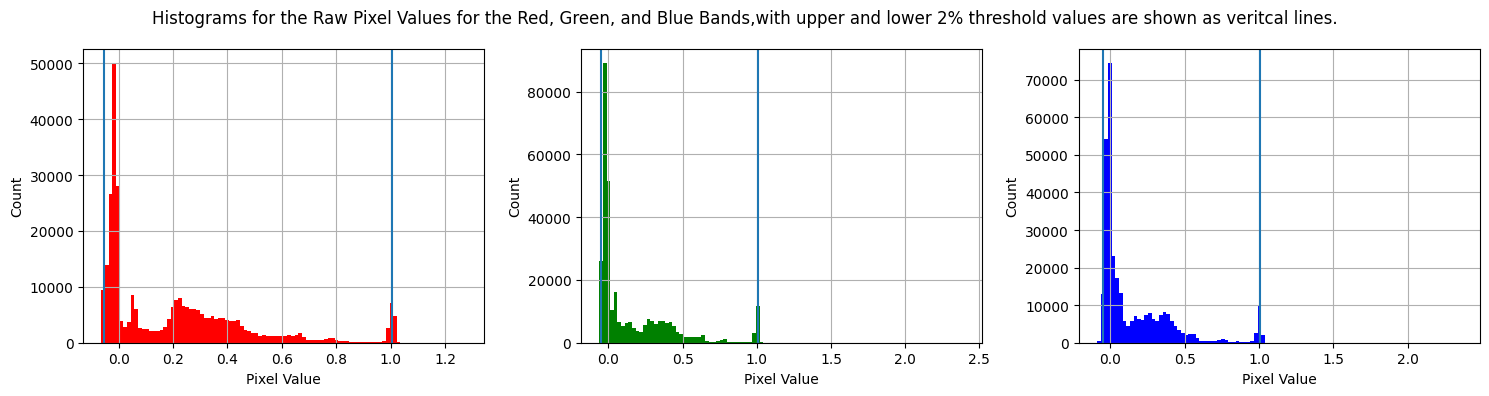

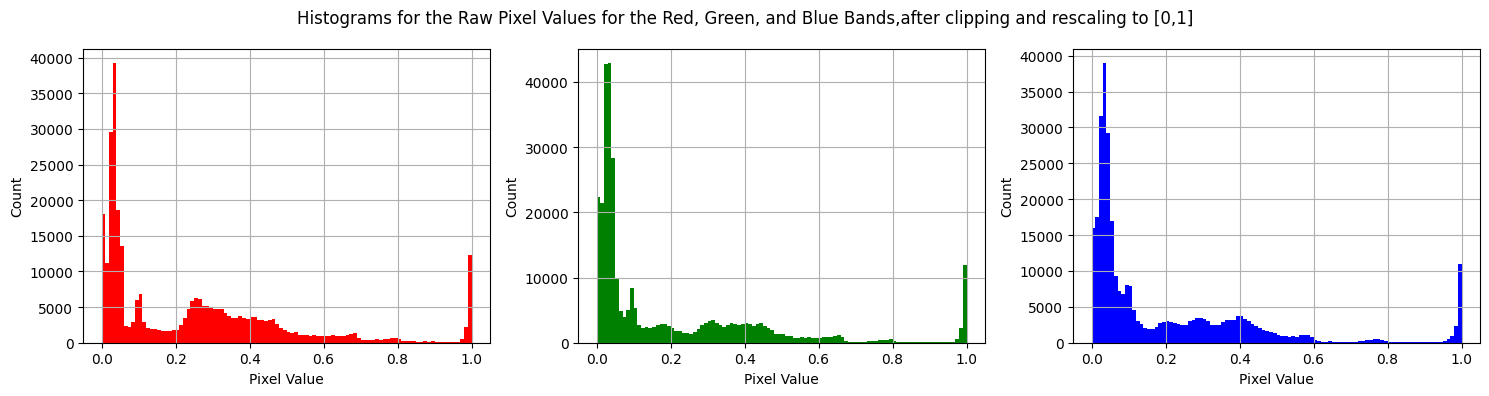

In [13]:
# Clip the upper and lower 2% in each band, then rescale to [0,1] and show the image.

# Create the RGB image, populated with the raw values for each band.
imRGB = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]

# Plot histograms of the pixel values before clipping.
fig, axs = plt.subplots(1,3, figsize=(15,4));
fig.suptitle('Histograms for the Raw Pixel Values for the Red, Green, and Blue Bands,'+
             'with upper and lower 2% threshold values are shown as veritcal lines.')
for i,clr in enumerate(['Red', 'Green', 'Blue']):
    axs[i].hist(imRGB[:,:,i].flatten(), bins=100, color=clr)
    lower_thresh = np.percentile(imRGB[:,:,i].flatten(), 2)
    axs[i].axvline(lower_thresh)
    upper_thresh = np.percentile(imRGB[:,:,i].flatten(), 98)
    axs[i].axvline(upper_thresh)
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
plt.tight_layout()

# Clip the bands
imRGB_clipped = imArr[:,:,[red_band_idx, green_band_idx, blue_band_idx]]
for i in range(3):
    # Create a variable to hold a single band from the image. 
    # This is not the most computationally efficient method, but simplifies the code.
    single_band = imRGB_clipped[:,:,i]
    # Clip the band
    lower_thresh = np.percentile(single_band.flatten(), 2)
    single_band[single_band < lower_thresh] = lower_thresh
    upper_thresh = np.percentile(single_band.flatten(), 98)
    single_band[single_band > upper_thresh] = upper_thresh
    # Rescale to [0,1].
    single_band = single_band - lower_thresh
    single_band = single_band / np.max(single_band)
    # Put the values for this band back into the RGB image.
    imRGB_clipped[:,:,i] = single_band

# Plot histograms of the pixel values after clipping.
fig, axs = plt.subplots(1,3, figsize=(15,4));
fig.suptitle('Histograms for the Raw Pixel Values for the Red, Green, and Blue Bands,'+
             'after clipping and rescaling to [0,1]')
for i,clr in enumerate(['Red', 'Green', 'Blue']):
    axs[i].hist(imRGB_clipped[:,:,i].flatten(), bins=100, color=clr)
    axs[i].set_xlabel('Pixel Value')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
plt.tight_layout()

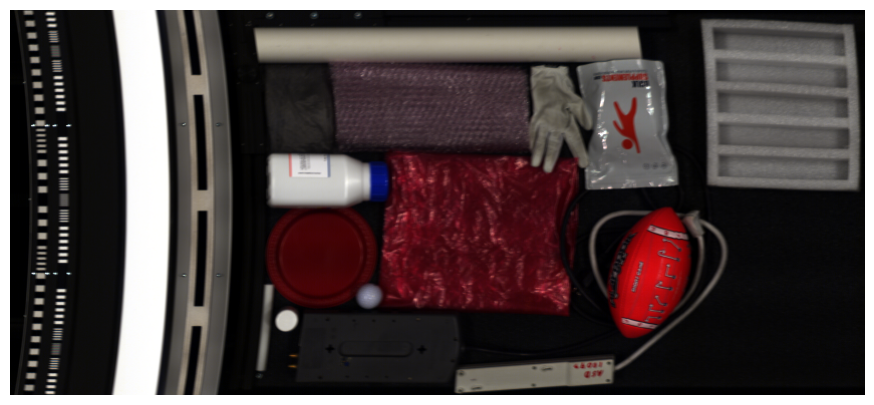

In [14]:
# Plot the clipped and rescaled image.
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB_clipped), axis=0));
plt.gca().invert_yaxis()  
plt.gca().set_axis_off()

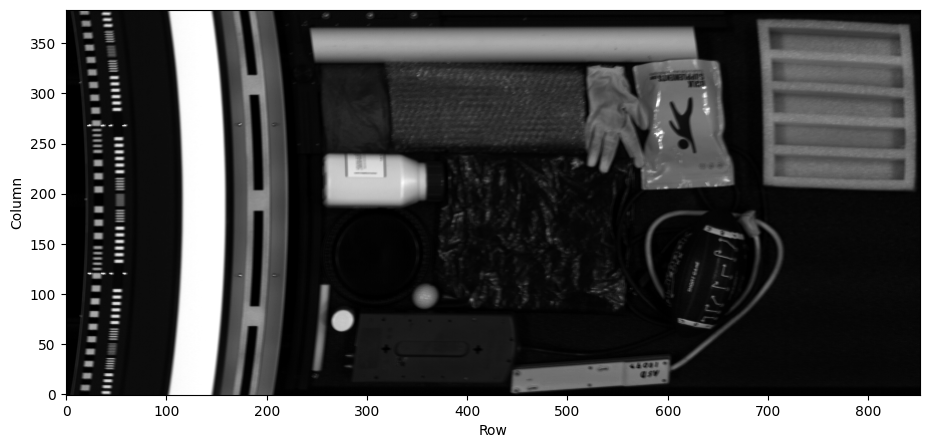

In [15]:
# View a single band from the clipped image as a grayscale image.
plt.figure(figsize=(15,5)) 
plt.imshow(np.flip(np.rot90(imRGB_clipped[:,:,1]), axis=0), cmap='gray');
plt.gca().invert_yaxis()  
plt.xlabel('Row');
plt.ylabel('Column');

# PART 3: Viewing pixel spectra from the image.

A simple visualization of the image, a labeled pixel, and the spectrum.

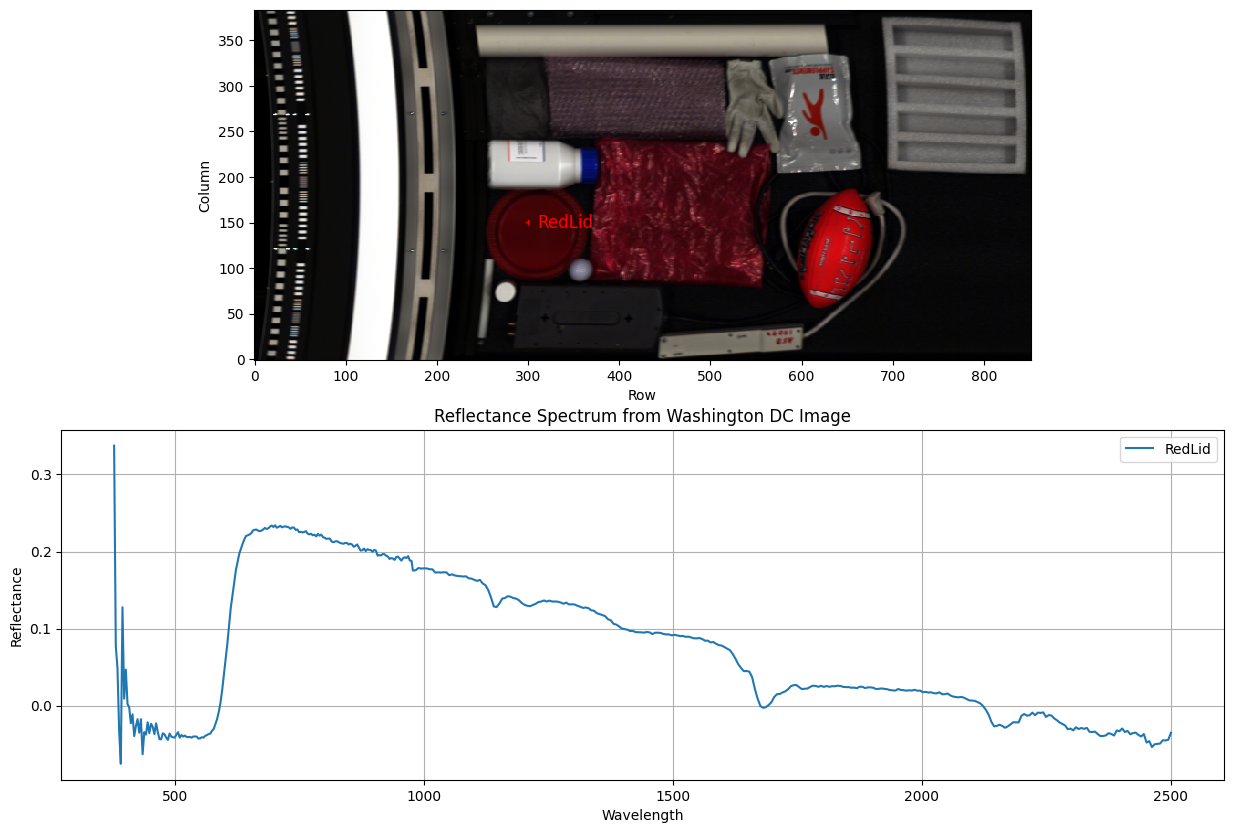

In [16]:
# Select coordinates for some pixels
loc = [300,150] # Location for the pixel
name = 'RedLid'

# Create a copy of the image
imRGBlabeled = copy.copy(imRGB_clipped)
plt.figure(figsize=(15,10)) # Create a figure with width=15, height=10
plt.subplot(2, 1, 1) # Create a grid of subplots with 2 rows and 1 column, and make plot 1 current
r,c = loc # get the row and column for the pixel
# Create a red plus-sign at the pixel.
for dr in range(-2,3):
    imRGBlabeled[r+dr, c, :] = [1,0,0]
for dc in range(-2,3):
    imRGBlabeled[r, c+dc, :] = [1,0,0]
plt.imshow(np.flip(np.rot90(imRGBlabeled), axis=0), interpolation='none');
plt.gca().invert_yaxis()  
plt.text(r+10, c, name, size=12, c='r', ha='left', va='center') # Add the label
plt.xlabel('Row');
plt.ylabel('Column');

plt.subplot(2, 1, 2) # For the grid of subplots with 2 rows and 1 column, and make plot 2 current
plt.plot(wl,imArr[r,c,:].flatten(), label=name)
plt.grid(True)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectrum from Washington DC Image')
plt.legend();

plt.savefig('temp.png')



In [17]:
def plot_im_spectra(imArrRGB, imArr, locs):# Create a copy of the image
    # Show the image imArr with the locations labeled
    # Inputs:
    #    imArrRGB: 3-dimensional numpy array for the visual RGB iamge
    #    imArr: multi-dimensional numpy array for the spectral iamge
    #    locations: list of [row,column,name,color] for each pixel of interest
    
    imRGBlabeled = copy.copy(imArrRGB)

    plt.figure(figsize=(15,10)) 
    plt.subplot(2, 1, 1) 
    for r,c,n,clr in locs:
        # Create a red plus-sign at the pixel.
        for dr in range(-2,3):
            imRGBlabeled[r+dr, c, :] = colors.to_rgb(clr)
        for dc in range(-2,3):
            imRGBlabeled[r, c+dc, :] = colors.to_rgb(clr)
    # show the image
    plt.imshow(np.flip(np.rot90(imRGBlabeled), axis=0), interpolation='nearest');
    plt.gca().invert_yaxis()  
    # Add the pixel markers and labels
    for r,c,n,clr in locs:
        plt.text(r+10, c, n, size=12, color=clr, ha='left', va='center') # Add the label
    plt.xlabel('Row');
    plt.ylabel('Column');

    # Plot the spectra
    plt.subplot(2, 1, 2) 
    for r,c,n,clr in locs:
        plt.plot(wl,imArr[r,c,:].flatten(), label=n, color=clr)
    plt.grid(True)
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title('Reflectance Spectra from Washington DC Image')
    plt.legend();

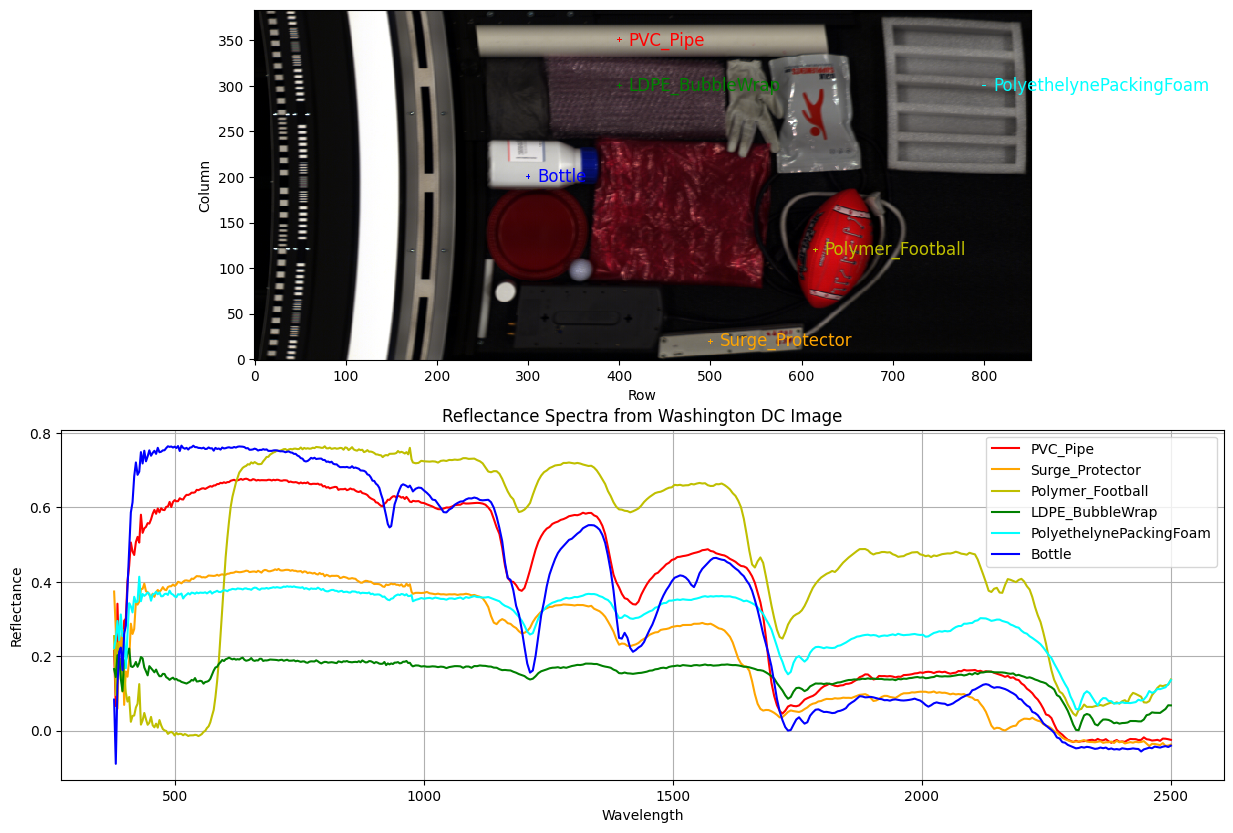

In [18]:
locs = [[400,350,'PVC_Pipe','r'],  [500,20,'Surge_Protector','orange'],   [615,120,'Polymer_Football','y'], 
        [400,300,'LDPE_BubbleWrap','g'], [800,300,'PolyethelynePackingFoam','cyan'],
        [300,200,'Bottle','b']]
plot_im_spectra(imRGB_clipped, imArr, locs)